## Using the data
After installing the package and downloading the data from Dryad you should be able to easily read the data or perform analyses.
Because the `DiamSar` package uses three or more datasets (five if you download PREDiCT and MODMA and more if you add your datasets) managing data paths is central to the project. A `borsar.project.Paths` object is used to store, retrieve and oranize paths and data for all studies.  
### `Paths`
Let's take a look at this object. We'll first import DiamSar and setup paths:

In [2]:
import DiamSar as ds

paths = ds.pth.set_paths(base_dir=r'D:\Dropbox\DANE\SarenkaData')

In [3]:
paths

The `Paths` object has `.get_path()` and `.get_data()` methods that we will first cover.  
`.get_path(path_name, study=study_letter)` allows to retrieve specific paths for each of the included datasets. For example, to get the data to eeg files for study C, rest task we do:

In [4]:
paths.get_path('eeg', study='C', task='rest')

'D:\\Dropbox\\DANE\\SarenkaData\\DiamSar\\eeg\\resampled set\\baseline_clean_exported'

We'll make sure that this directory indeed contains `.set` EEG files:

In [5]:
import os

eeg_path = paths.get_path('eeg', study='C', task='rest')
files = os.listdir(eeg_path)
print(files[:6])

['baseline_diam_001_AK.fdt', 'baseline_diam_001_AK.rej', 'baseline_diam_001_AK.set', 'baseline_diam_003_AK.fdt', 'baseline_diam_003_AK.rej', 'baseline_diam_003_AK.set']


Apart from `.set` files we see standard EEGLAB `.fdt` files and also `.rej` files - a special format used by DiamSar to store signal annotations regarding signal segments to reject.  
Some other paths that may be worth to know:

In [9]:
# print(paths.get_path('beh', study='A'))  # behavioral data for study B
print(paths.get_path('chanpos', study='B'))  # channel positions for study B
print(paths.get_path('src', study='C'))  # source space information

D:\Dropbox\DANE\SarenkaData\Wronski\eeg\chanpos
D:\Dropbox\DANE\SarenkaData\DiamSar\eeg\src


### Reading precomputed data
The power spectra per channel and participant have been precomuted and can be read via `paths.get_data('psd', study=study_letter)`. We will now read spectra for study C and see how the data are structured:

In [11]:
data = paths.get_data('psd', study='C')

The output are four elements actually, that's why we get a tuple of length 4:

In [17]:
print('type:', type(data), '\nlength:', len(data))

type: <class 'tuple'> 
length: 4


The elements are: the power spectra, frequency bins, channel names and subject identifiers:

In [21]:
psds, freqs, ch_names, subj_ids = data

for elem in [freqs, ch_names, subj_ids]:
    print(elem[:10])

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9']
[ 1  3  5  6 10 11 12 15 17 23]


The power spectra are in a `subjects x channels x frequencies` format:

In [22]:
psds.shape

(93, 64, 251)

Let's plot the spectra for one of the subjects:

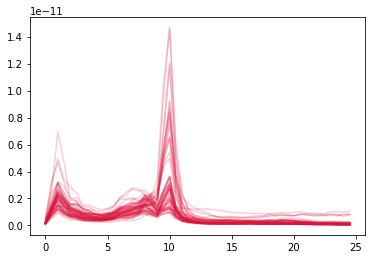

In [29]:
import matplotlib.pyplot as plt

subj_idx = 24
upto = 50

plt.plot(freqs[:upto], psds[subj_idx, :, :upto].T, color='crimson', alpha=0.2);

To plot the topography for a specific frequency we'll also need an info object:

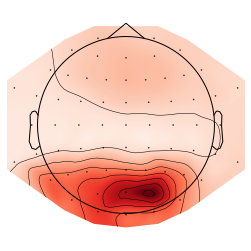

(<matplotlib.image.AxesImage at 0xf970548>,
 <matplotlib.contour.QuadContourSet at 0xf9a4e48>)

In [37]:
info = paths.get_data('info', study='C')

# we have to fix the channel positions to be in correct units
import sarna
sarna.utils.fix_channel_pos(info)

import mne
mne.viz.plot_topomap(psds[subj_idx, :, 19], info, extrapolate='local')

The data are also available in csd reference and in source space. Let's just briefly take a look at the csd topography for the alpha peak for this particular subject:

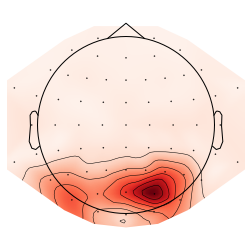

(<matplotlib.image.AxesImage at 0xf9e2608>,
 <matplotlib.contour.QuadContourSet at 0x10589f48>)

In [39]:
psds_csd = paths.get_data('psd', study='C', space='csd')[0]
mne.viz.plot_topomap(psds_csd[subj_idx, :, 19], info, extrapolate='local')

### Reading the raw data
The continuous preprocessed data can also be read by `ds.read_raw(subject_id)`. We need to pass a valid subject identifier. The `study` and `space` arguments behave the same as before: 

In [40]:
raw, events = ds.read_raw(23, study='C', space='avg')

Used Annotations descriptions: ['S 10', 'S 11', 'boundary']


C:\src\DiamSar\io.py:617: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annot)


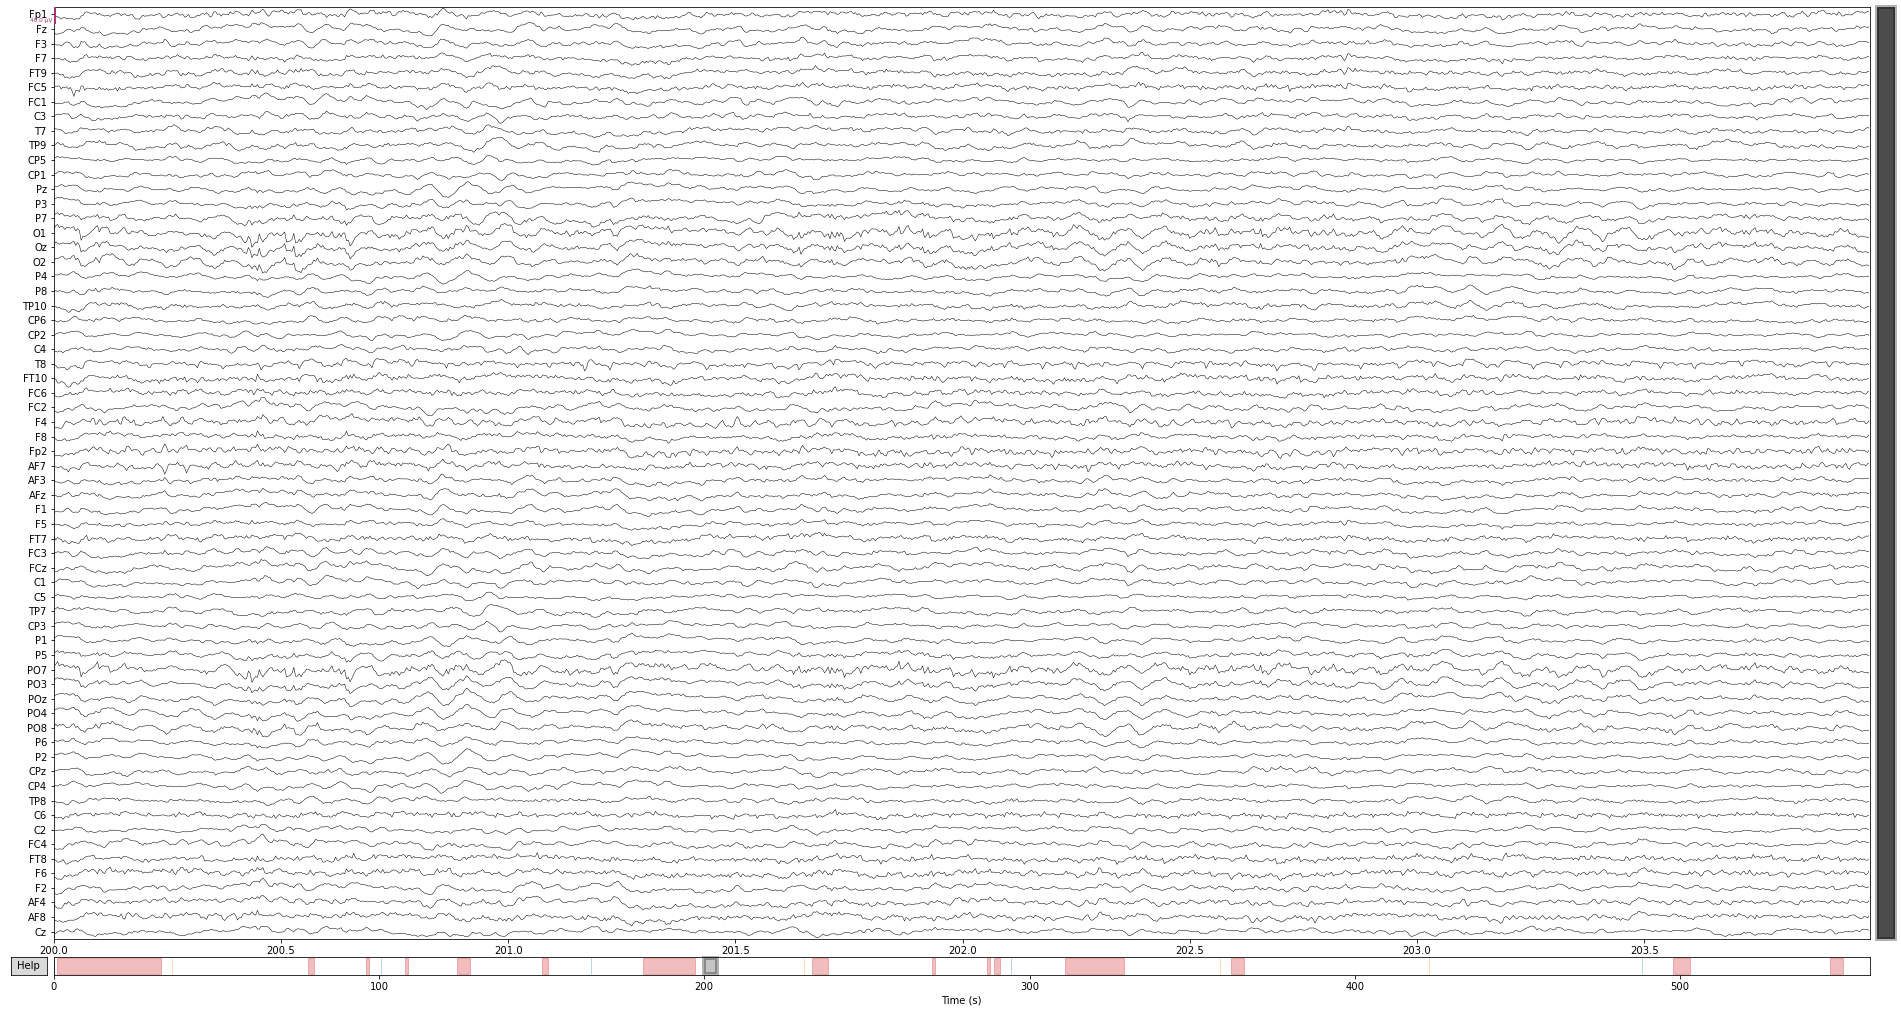

In [43]:
raw.plot(n_channels=64, start=200, duration=4);

To check valid identifiers for given study you can use:

In [46]:
subj_ids = ds.pth.get_subject_ids(study='C')
print(subj_ids[:15])

[1, 3, 5, 6, 10, 11, 12, 15, 17, 23, 25, 26, 30, 34, 37]
